In [12]:
#I have a GPU that isn't set up to run with tensorflow, so I tell the program to ignore that it exists
#Feel free to comment out these lines if you do not have this issue
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

#Imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_hub as hub

#Load Magenta Arbitrary Image Stylization network
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

In [ ]:
#define helper function to scale images
def img_scaler(image, max_dim = 512):

  #Casts tensor to a new data type
  original_shape = tf.cast(tf.shape(image)[:-1], tf.float32)

  #Creates scale constant for the image based on imput max_dim
  scale_ratio = max_dim / max(original_shape)

  #Casts tensor to a new data type
  new_shape = tf.cast(original_shape * scale_ratio, tf.int32)

  #Resizes image
  return tf.image.resize(image, new_shape)

In [ ]:
#define helper function to load image
def load_img(image_path, max_dim = 512):

  #Read contents of the input filename
  img = tf.io.read_file(image_path)

  #Detect whether an image is a BMP, GIF, JPEG, or PNG, 
  #performs the appropriate operation
  #convert the input bytes string into a Tensor of type dtype 
  img = tf.image.decode_image(img, channels=3)

  #Convert image to dtype
  img = tf.image.convert_image_dtype(img, tf.float32)

  #Scale the image using the created scaler function
  img = img_scaler(img, max_dim)

  #Adds a fourth dimension to the Tensor because the model requires a 4-dimensional Tensor
  return img[tf.newaxis, :]

In [249]:
#Load images

#Path to local image to be stylized- use any images you have!
#content_path = "ContentImages/134012704.jpg"
#content_path = "ContentImages/20190428_164458.jpg"
#content_path = "ContentImages/20200913_152202.jpg"
#content_path = "ContentImages/20181020_185550.jpg"
content_path = "ContentImages/20220115_021652.jpg"

#Find style images online
#I used the following most famous images from each artist (feel free to find some others if you want!):
##Van Gogh -> Starry Night
##da Vinci -> Mona Lisa
##Dali -> The Persistence of Memory
##Monet -> Water Lilies
##Picasso -> The Weeping Woman
##Rembrandt -> The Night Watch
style_path_van_gogh = keras.utils.get_file('Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg', 
                                           'https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg')
style_path_davinci = keras.utils.get_file('Leonardo_da_Vinci_-_Mona_Lisa_%28La_Gioconda%29_-_WGA12711.jpg', 
                                          'https://upload.wikimedia.org/wikipedia/commons/f/f2/Leonardo_da_Vinci_-_Mona_Lisa_%28La_Gioconda%29_-_WGA12711.jpg')
style_path_dali = keras.utils.get_file('The_Persistence_of_Memory.jpg', 
                                       'https://upload.wikimedia.org/wikipedia/en/d/dd/The_Persistence_of_Memory.jpg')
style_path_monet = keras.utils.get_file('Claude_Monet_-_Water_Lilies_-_Google_Art_Project_%28462013%29.jpg',
                                        'https://upload.wikimedia.org/wikipedia/commons/a/af/Claude_Monet_-_Water_Lilies_-_Google_Art_Project_%28462013%29.jpg')
style_path_picasso = keras.utils.get_file('Picasso_The_Weeping_Woman_Tate_identifier_T05010_10.jpg', 
                                          'https://upload.wikimedia.org/wikipedia/en/1/14/Picasso_The_Weeping_Woman_Tate_identifier_T05010_10.jpg')
style_path_rembrandt = keras.utils.get_file('1259px-The_Nightwatch_by_Rembrandt_-_Rijksmuseum.jpg', 
                                            'https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/The_Nightwatch_by_Rembrandt_-_Rijksmuseum.jpg/1259px-The_Nightwatch_by_Rembrandt_-_Rijksmuseum.jpg')

#Tune the resolution of the images as you wish to change the effect of the style transform
#Different resolutions will produce different coloring and style effects
#Some good baselines that I found for each artist are:
##Monet, Picasso, Rembrandt -> 256
##Van Gogh, da Vinci -> 442
##Dali -> 512
style_max_dim = 256
oc_max_dim = 1080

#Load the content image (user image to be stylized)
content_image = load_img(content_path, max_dim=oc_max_dim)

#Load the style image (artist image to copy style from, with web paths defined as above)
#style_image = load_img(style_path_van_gogh, style_max_dim)
#style_image = load_img(style_path_monet, style_max_dim)
#style_image = load_img(style_path_davinci, style_max_dim)
#style_image = load_img(style_path_rembrandt, style_max_dim)
#style_image = load_img(style_path_dali, style_max_dim)
style_image = load_img(style_path_picasso, style_max_dim)



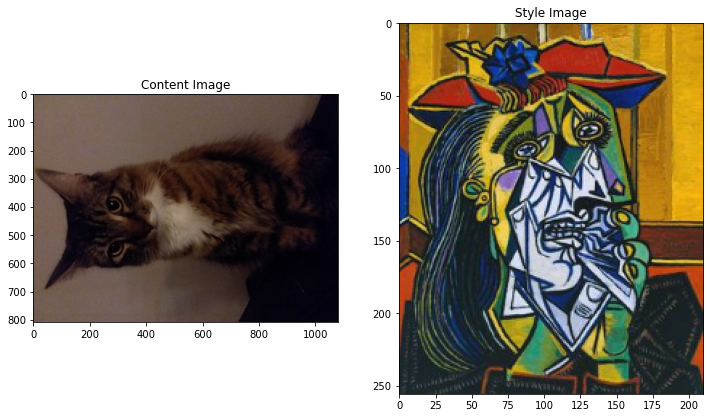

In [250]:
#Test plot the loaded images to make sure they are found properly

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(content_image[0])
plt.title('Content Image')
plt.subplot(1, 2, 2)
plt.imshow(style_image[0])
plt.title('Style Image')

plt.show()

In [251]:
#Pass content and style images as arguments in TensorFlow Constant object format
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

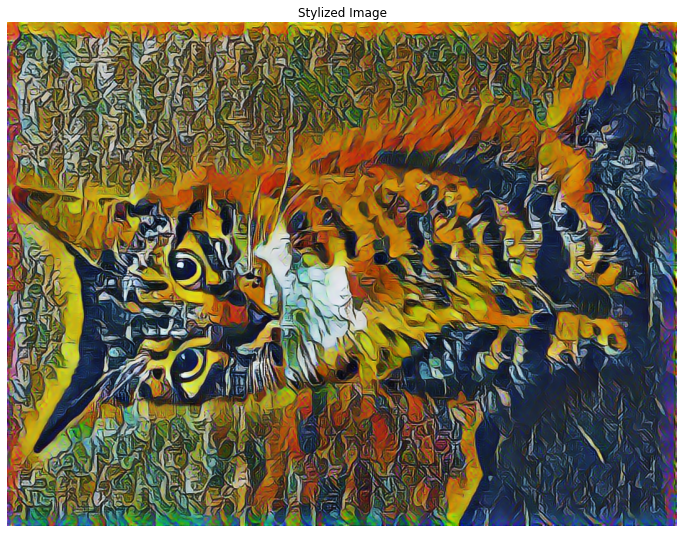

In [252]:
#Plot stylized image

plt.figure(figsize=(12, 12))
plt.imshow(stylized_image[0])
plt.title('Stylized Image')
plt.axis('off')

plt.show()